
# 🌼 기계학습 및 데이터 전처리 - 4차시(24.11.05)

---


## 1. 결정트리 모델 (Decision Tree)
### 1-1. 결정트리
- 나무 구조를 통해 데이터를 분류하거나 예측하는 알고리즘
- 질문을 통해 데이터를 분리하여 각 분기점에서 feature를 기반으로 데이터를 나누어 최종 결과에 도달
- 해석이 쉽고 시각화가 용이하지만, 과적합의 위험이 있음

### 1-2. 결정트리의 구조
- 루트 노드 : 데이터를 처음으로 분리하는 지점
- 내부 노드 : 데이터를 추가로 분리하는 지점
- 단말 노드(leaf) : 최종 분류 결과

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# 나이와 흡연 여부 등으로 질병의 유무를 분류하는 과정
data = {
    '나이': [45, 50, 36, 29, 60, 38, 42, 31, 57, 40, 49, 35, 53, 46, 32, 59, 37, 34, 44, 51],
    'BMI': [22, 28, 24, 19, 30, 27, 21, 20, 29, 25, 26, 23, 31, 29, 22, 34, 24, 20, 27, 32],
    '흡연 여부': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
    '운동 빈도': [2, 1, 3, 5, 0, 2, 4, 5, 1, 3, 2, 4, 0, 1, 5, 1, 3, 4, 2, 1],
    '질병 유무': [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
}

In [202]:
df = pd.DataFrame(data)
df.head()

,나이,BMI,흡연 여부,운동 빈도,질병 유무
0,45,22,1,2,1
1,50,28,0,1,0
2,36,24,1,3,0
3,29,19,0,5,0
4,60,30,1,0,1


In [203]:
X = df[['나이', 'BMI', '흡연 여부', '운동 빈도']]
y = df['질병 유무']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
dt_ = DecisionTreeClassifier(random_state=42)
dt_.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [206]:
y_pred = dt_.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [207]:
X_test

,나이,BMI,흡연 여부,운동 빈도
0,45,22,1,2
17,34,20,0,4
15,59,34,1,1
1,50,28,0,1


In [208]:
result_df = pd.DataFrame({
    '실제 질병 유무' : y_test,
    '예측 질병 유무' : y_pred
})

In [209]:
result_df['정확히 예측'] = result_df['실제 질병 유무'] == result_df['예측 질병 유무']
result_df

,실제 질병 유무,예측 질병 유무,정확히 예측
0,1,1,True
17,0,0,True
15,1,1,True
1,0,1,False


In [210]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [211]:
feature_nm = X.columns.to_list()
feature_nm

['나이', 'BMI', '흡연 여부', '운동 빈도']

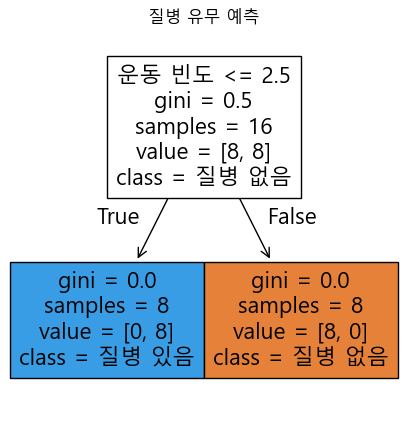

In [212]:
plt.figure(figsize = (5, 5))
plot_tree(dt_, feature_names = feature_nm, class_names = ['질병 없음', '질병 있음'], filled=True)
plt.title('질병 유무 예측')
plt.show()

In [213]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [214]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [215]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [216]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [217]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [218]:
y = pd.Series(data.target, name = '양성 여부')
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: 양성 여부, Length: 569, dtype: int64

In [219]:
df = pd.concat([X, y], axis = 1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,양성 여부
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [220]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y, test_size=.2, random_state=42)

In [221]:
X_test_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [222]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(random_state=42)

In [223]:
y_pred_cancer = dt_classifier.predict(X_test_cancer)
y_pred_cancer

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [224]:
result_df_cancer = pd.DataFrame({
    '실제 유방암 유무' : y_test_cancer,
    '예측 유방암 유무' : y_pred_cancer
})

In [225]:
result_df_cancer

,실제 유방암 유무,예측 유방암 유무
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1
...,...,...
486,1,1
75,0,0
249,1,1
238,1,1


In [226]:
result_df_cancer['정확히 예측'] = result_df_cancer['실제 유방암 유무'] == result_df_cancer['예측 유방암 유무']
result_df_cancer

,실제 유방암 유무,예측 유방암 유무,정확히 예측
204,1,1,True
70,0,0,True
131,0,0,True
431,1,1,True
540,1,1,True
...,...,...,...
486,1,1,True
75,0,0,True
249,1,1,True
238,1,1,True


In [227]:
result_df_cancer[100:110]

,실제 유방암 유무,예측 유방암 유무,정확히 예측
182,0,0,True
140,1,1,True
77,0,0,True
408,0,0,True
549,1,1,True
530,1,1,True
163,1,1,True
503,0,0,True
148,1,0,False
486,1,1,True


In [228]:
result_df_cancer[result_df_cancer['정확히 예측'] == False]

,실제 유방암 유무,예측 유방암 유무,정확히 예측
81,1,0,False
73,0,1,False
520,1,0,False
255,0,1,False
86,0,1,False
148,1,0,False


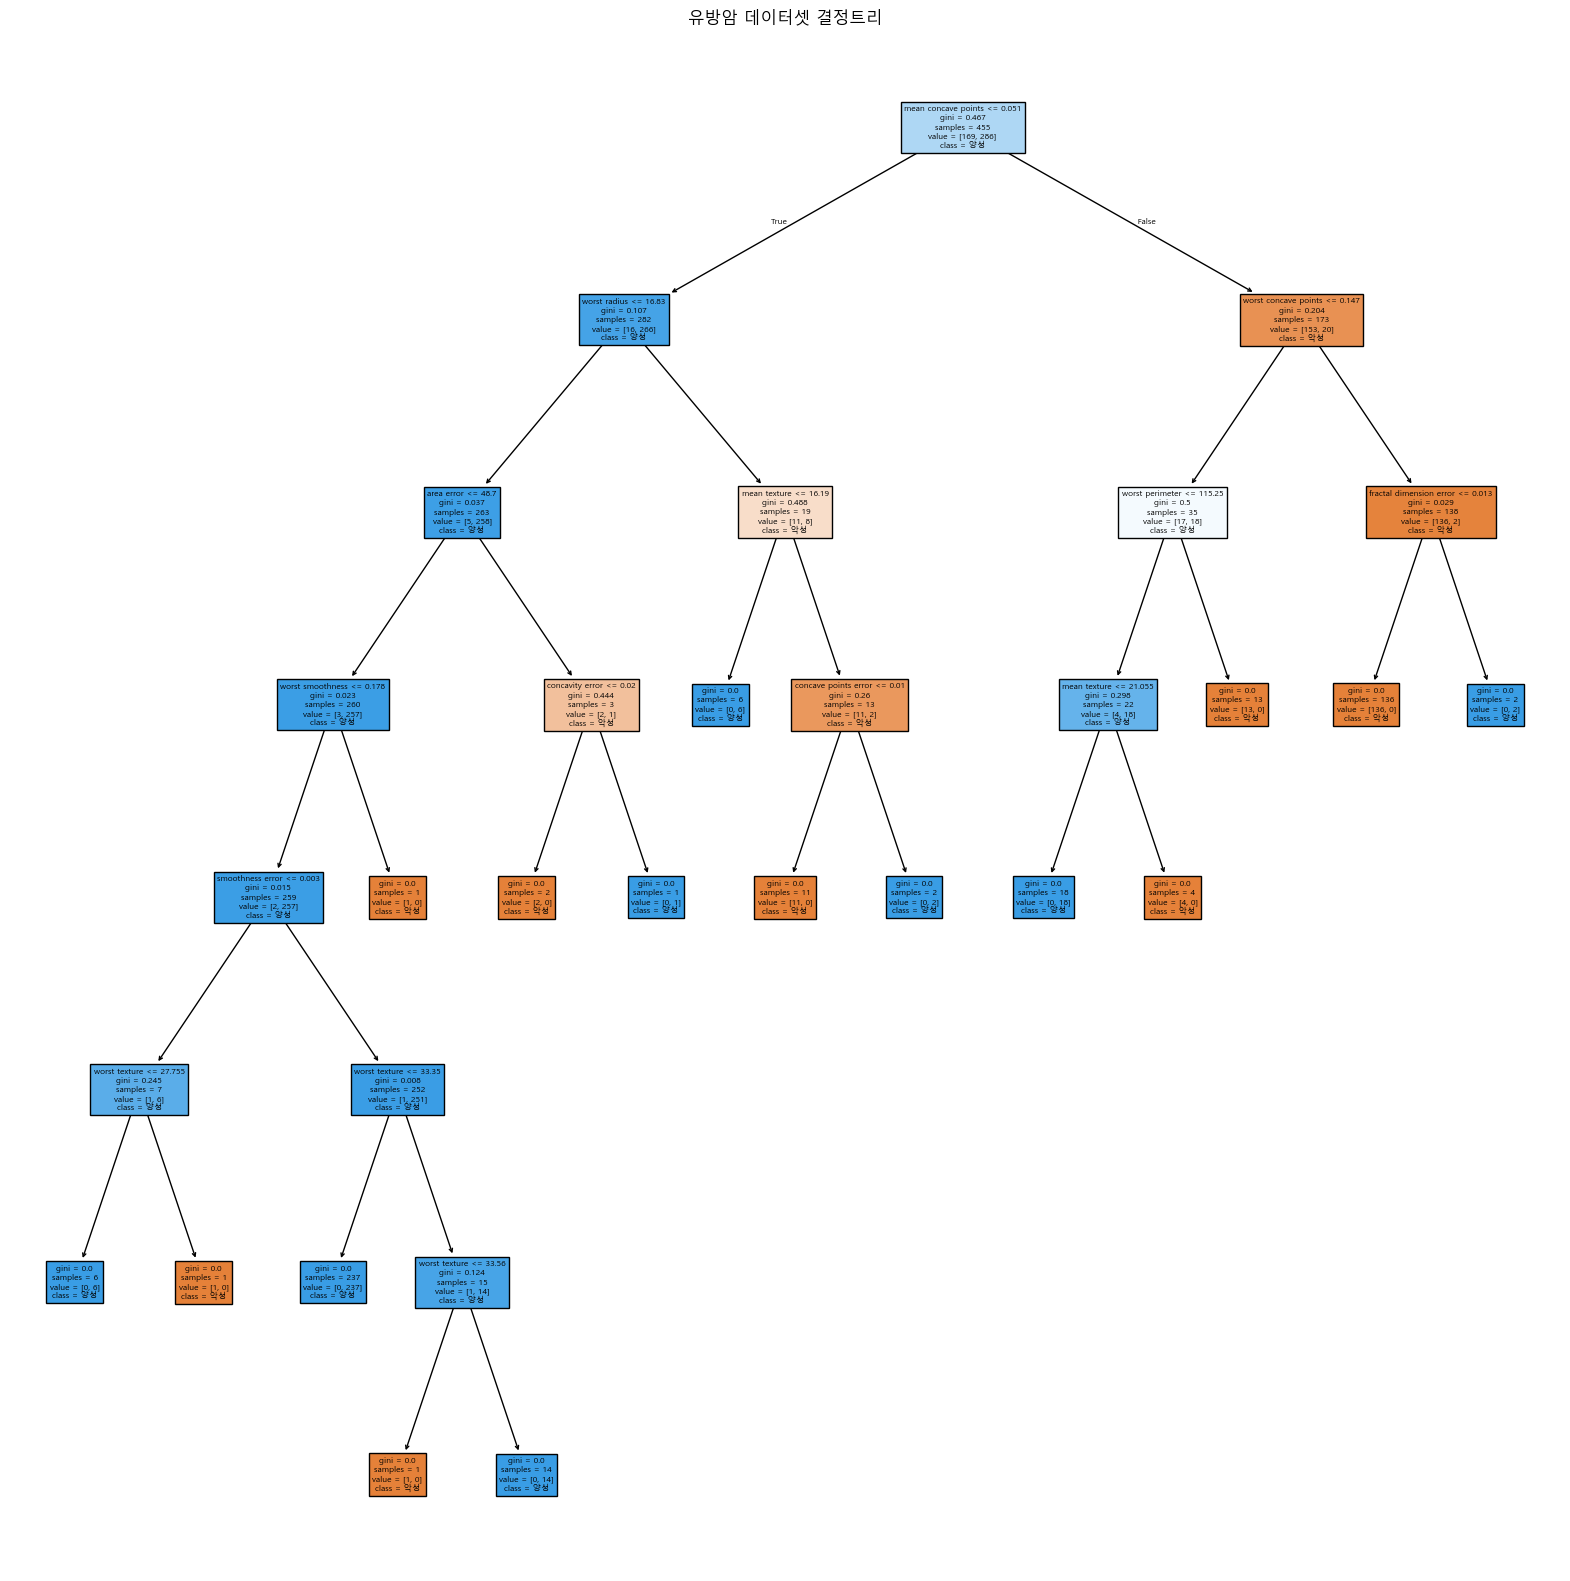

In [229]:
plt.figure(figsize=(20, 20))
plot_tree(dt_classifier, feature_names=data.feature_names, class_names = ['악성', '양성'], filled=True)
plt.title('유방암 데이터셋 결정트리')
plt.show()

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
precision = precision_score(y_test_cancer, y_pred_cancer)
recall = recall_score(y_test_cancer, y_pred_cancer)
f1 = f1_score(y_test_cancer, y_pred_cancer)

In [231]:
print(f'정확도 : {accuracy:.2f}')
print(f'정밀도 : {precision:.2f}')
print(f'재현율 : {recall:.2f}')
print(f'F1-Score : {f1:.2f}')

정확도 : 0.95
정밀도 : 0.96
재현율 : 0.96
F1-Score : 0.96


In [232]:
dt_classifier2 = DecisionTreeClassifier(
    random_state = 42,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5
)

In [233]:
dt_classifier2.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [234]:
y_pred_cancer = dt_classifier2.predict(X_test_cancer)
y_pred_cancer

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

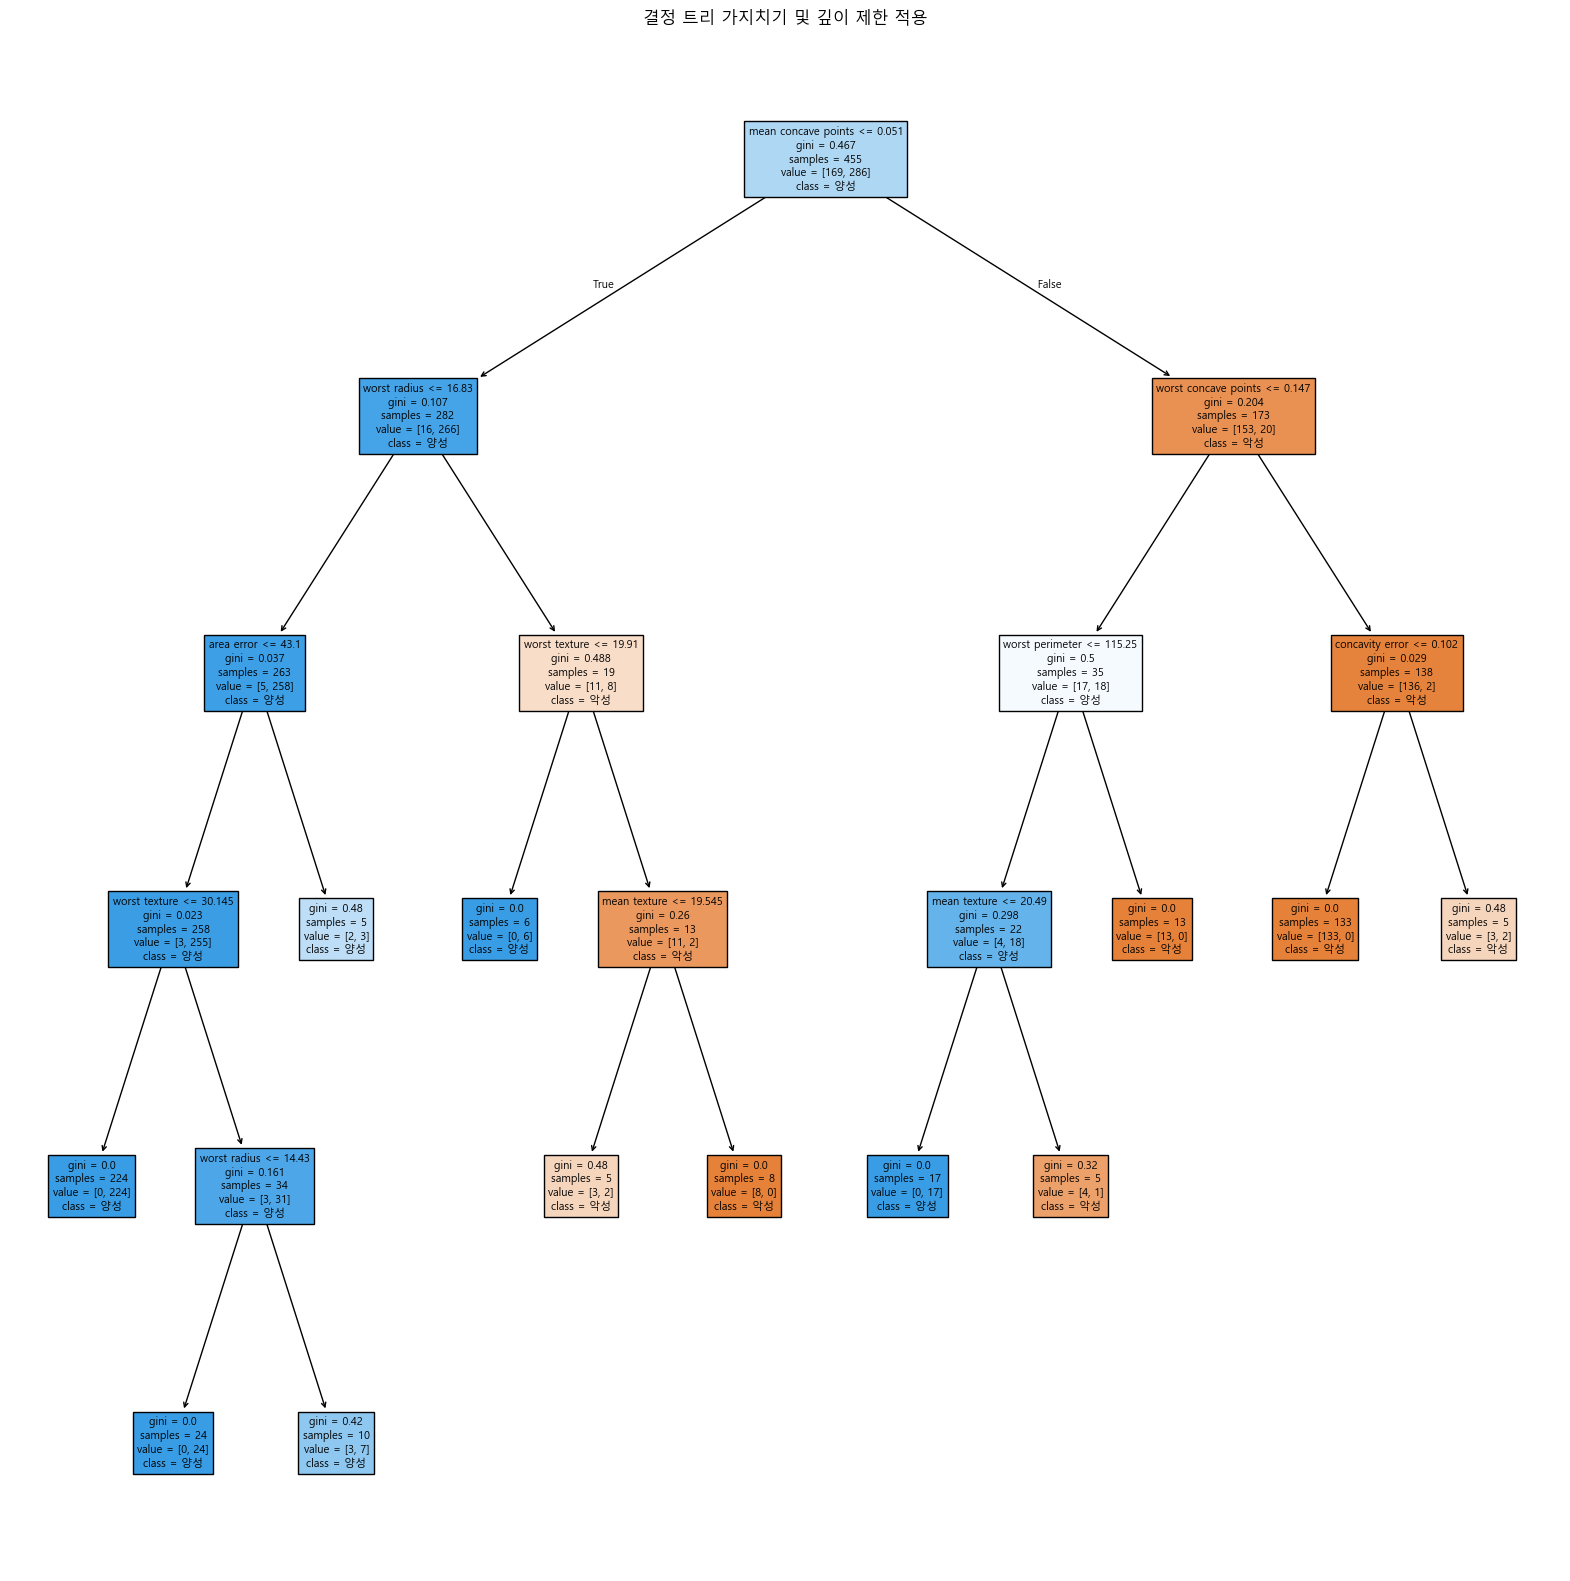

In [235]:
plt.figure(figsize = (20, 20))
plot_tree(dt_classifier2, feature_names=data.feature_names, class_names = ['악성', '양성'], filled=True)
plt.title('결정 트리 가지치기 및 깊이 제한 적용')
plt.show()

In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
precision = precision_score(y_test_cancer, y_pred_cancer)
recall = recall_score(y_test_cancer, y_pred_cancer)
f1 = f1_score(y_test_cancer, y_pred_cancer)

In [237]:
print(f'정확도 : {accuracy:.2f}')
print(f'정밀도 : {precision:.2f}')
print(f'재현율 : {recall:.2f}')
print(f'F1-Score : {f1:.2f}')

정확도 : 0.96
정밀도 : 0.96
재현율 : 0.97
F1-Score : 0.97


## 2. 앙상블 기법 (Ensemble Learning)
- 여러 모델을 결합하여 더 좋은 예측 성능 얻기
- 보팅, 배깅, 부스팅 등 다양한 방법이 있음
- 각각의 모델이 가진 단점을 상호 보완할 수 있고 더 정확한 결과를 도출할 수 있음

### 2-1. 보팅 (Voting)
- 각각의 모델이 같은 데이터를 학습하고 각 모델의 예측 결과를 다수결로 결정하기
- 가장 많은 표를 얻은 결과를 선택하는 하드 보팅과, 각 모델의 예측 확률을 더해 가장 높은 확률을 가진 결과를 선택하는 소프트 보팅이 있음

### 2-2. 배깅 (Bagging)
- 같은 모델을 여러번 학습시키고 각 모델의 예측을 결합하여 사용
- 랜덤하게 샘플링한 데이터로 여러 개의 모델을 학습시키고 그 결과를 모아 다수결 또는 평균으로 예측
- 같은 시험을 여러번 보면서 랜덤하게 문제를 골라서 풀고, 그 결과를 모아 평균을 낸다
- 과적합을 방지하는데 효과적으로 랜덤포레스트가 대표적인 모델

### 2-3. 부스팅
- 성능이 낮은 모델을 순차적으로 학습시켜 이전 모델의 오류를 보완
- 이전 모델이 잘못 예측한 부분을 중점적으로 학습하여 최종적으로 모든 모델을 결합하여 더 나은 예측을 생성


|특징|	보팅 (Voting)|	배깅 (Bagging)|	부스팅 (Boosting)|
|---|---|---|---|
|기본 개념	|여러 모델을 사용해 다수결로 예측|	같은 모델을 여러 번 사용해 예측 결합|	약한 모델을 순차적으로 학습, 오류 보완|
|모델 종류|	서로 다른 모델을 결합	|같은 모델 여러 개 사용	|약한 모델을 순차적으로 학습|
|대표 알고리즘	|VotingClassifier	|RandomForest|	AdaBoost, Gradient Boosting|
|예측 결합 방식	|다수결 또는 확률의 합|	다수결 또는 평균	|각 모델의 가중치를 고려한 결합|
|과적합 방지	|부분적 방지 가능	|과적합 방지에 매우 효과적	|과적합 방지보다는 오류 보완에 초점|

### 2-4. 랜덤 포레스트
- 결정트리를 여러번 학습시키고 결과를 결합하는 방식
- 무작위로 선택된 데이터 샘플로 학습되며 최종 예측은 각 결정트리의 다수결을 따른다
1. 데이터 샘플링 : 주어진 데이터에서 여러 개의 랜덤 샘플 생성(중복 허용)
2. 결정트리 학습 : 각 샘플을 사용하여 결정트리 모델 학습
3. 결정트리 결합 : 학습된 모든 결정트리가 각자 예측하고 그 예측 결과를 다수결로 결합하여 최종 예측을 만듦

* 장점 : 과적합 위험 감소, 다양한 특성 처리 가능(연속형 범주형), 해석이 직관적

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [239]:
# 나이와 월소득, 쇼핑빈도와 광고 클릭 횟수에 따른 구매여부 예측
data = {
    '나이': [25, 34, 45, 23, 35, 52, 41, 39, 29, 58, 32, 47, 50, 28, 44, 38, 24, 27, 53, 37],
    '월 소득(만원)': [300, 450, 600, 250, 400, 700, 550, 500, 320, 750, 420, 610, 650, 330, 580, 490, 310, 290, 720, 430],
    '온라인 쇼핑 빈도(회/월)': [10, 15, 8, 12, 16, 7, 13, 14, 11, 6, 12, 9, 8, 10, 7, 13, 9, 10, 5, 11],
    '광고 클릭 수(회/월)': [5, 8, 6, 7, 9, 4, 8, 7, 6, 3, 7, 6, 5, 5, 4, 8, 6, 6, 2, 7],
    '구매 여부': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
}

import pandas as pd

df = pd.DataFrame(data)
df.head()


,나이,월 소득(만원),온라인 쇼핑 빈도(회/월),광고 클릭 수(회/월),구매 여부
0,25,300,10,5,1
1,34,450,15,8,0
2,45,600,8,6,1
3,23,250,12,7,0
4,35,400,16,9,1


In [240]:
X = df.drop('구매 여부', axis = 1)

In [241]:
y = df['구매 여부']

In [242]:
X_train_pur, X_test_pur, y_train_pur, y_test_pur = train_test_split(X, y, test_size=.2, random_state=42)

In [243]:
X_test_pur

,나이,월 소득(만원),온라인 쇼핑 빈도(회/월),광고 클릭 수(회/월)
0,25,300,10,5
17,27,290,10,6
15,38,490,13,8
1,34,450,15,8


In [244]:
voting_clf = VotingClassifier(
    estimators = [
        ('logistic', LogisticRegression()),
        ('dt', DecisionTreeClassifier())
    ],
    voting = 'soft'
)

In [245]:
voting_clf.fit(X_train_pur,y_train_pur)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [246]:
voting_soft_pred = voting_clf.predict(X_test_pur)

In [247]:
print(f'보팅(soft) 분류기의 정확도 : {accuracy_score(y_test_pur, voting_soft_pred)}')

보팅(soft) 분류기의 정확도 : 0.25


In [248]:
# hard voting
voting_clf_hard = VotingClassifier(
    estimators = [
        ('logistic', LogisticRegression()),
        ('dt', DecisionTreeClassifier())
    ],
    voting = 'hard'
)

In [249]:
voting_clf_hard.fit(X_train_pur, y_train_pur)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])

In [250]:
voting_hard_pred = voting_clf_hard.predict(X_test_pur)

In [251]:
print(f'보팅(hard) 분류기의 정확도 : {accuracy_score(y_test_pur, voting_hard_pred)}')

보팅(hard) 분류기의 정확도 : 0.5


In [252]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [253]:
rf_classifier.fit(X_train_pur, y_train_pur)
rf_pred = rf_classifier.predict(X_test_pur)

In [254]:
print(f'랜덤 포레스트 정확도 : {accuracy_score(y_test_pur, rf_pred)}')

랜덤 포레스트 정확도 : 0.5


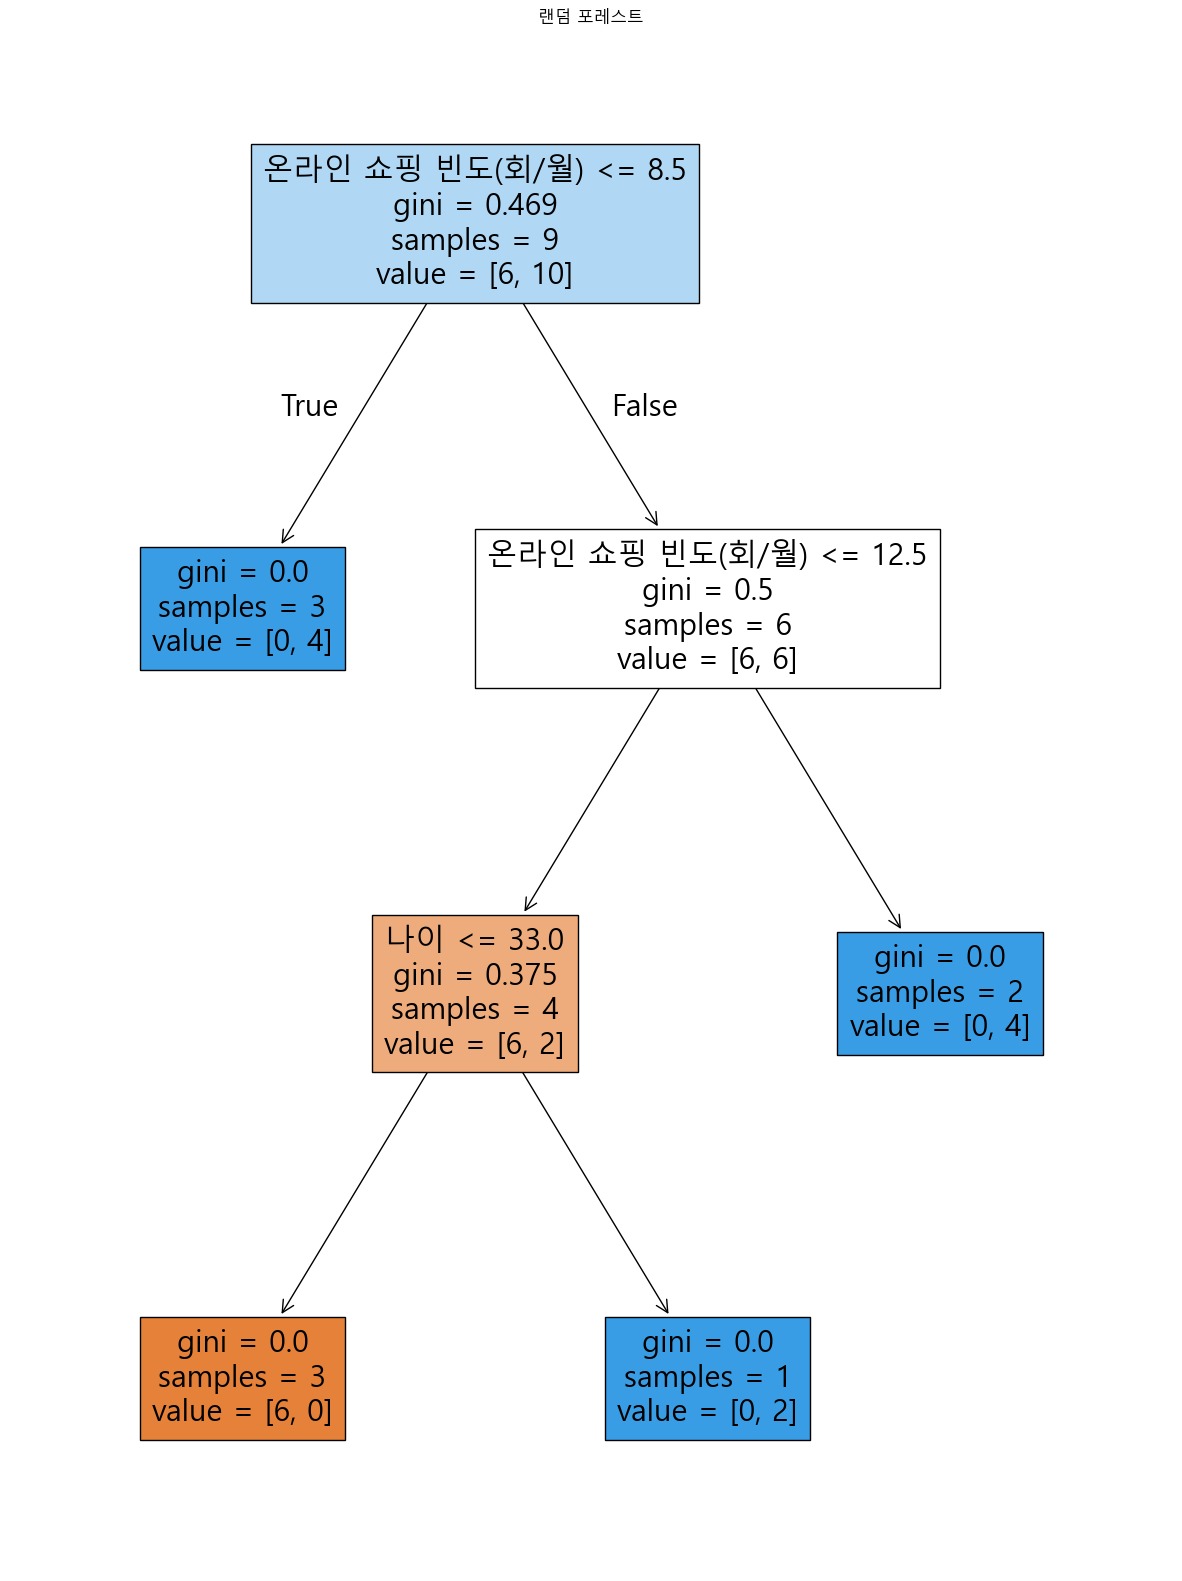

In [263]:
plt.figure(figsize = (15, 20))
plot_tree(rf_classifier.estimators_[1], feature_names = X.columns, filled=True)
plt.title('랜덤 포레스트')
plt.show()

In [264]:
feature_imp = rf_classifier.feature_importances_
feature_imp

array([0.45127514, 0.3086924 , 0.17236046, 0.067672  ])

In [265]:
features = X.columns

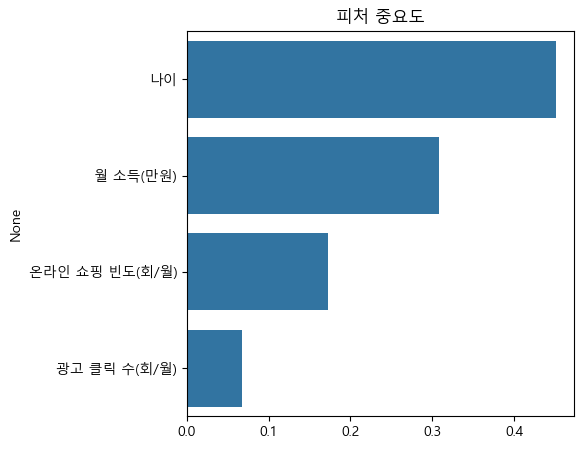

In [266]:
plt.figure(figsize=(5, 5))
sns.barplot(x=feature_imp, y = features)
plt.title('피처 중요도')
plt.show()

In [267]:
boosting_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth = 1),
    n_estimators=100,
    random_state=42
)

In [268]:
boosting_clf.fit(X_train_pur, y_train_pur)
boosting_pred = boosting_clf.predict(X_test_pur)

c:\Users\RMARKET\anaconda3\envs\test_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [270]:
print(f'부스팅 분류기의 정확도 : {accuracy_score(y_test_pur, boosting_pred)}')

부스팅 분류기의 정확도 : 0.25


## 3. 클러스터링 (Clustering)
### 3-1. 클러스터링
- 데이터를 유사한 그룹으로 묶는 비지도 학습 방법
- 주어진 데이터에 대한 정답이 없는 상태에서 그룹으로 나눔

### 3-2. K-Means Clustering
- 데이터를 K개의 그룹으로 나누는 방법
- 각 그룹의 중심점을 기준으로 데이터를 나누고, 그룹 내 데이터들이 최대한 유사하게 만드는 알고리즘

In [287]:
from sklearn.cluster import KMeans

In [288]:
data = {
    '고객 나이': [22, 25, 24, 26, 23, 27, 28, 29, 60, 62, 
               61, 58, 57, 55, 54, 56, 45, 48, 50, 53],
    '연간 소비 금액(만원)': [100, 150, 120, 130, 110, 140, 135, 125, 
                         600, 650, 700, 620, 590, 630, 610, 580, 
                         350, 300, 400, 450]
}

In [289]:
df = pd.DataFrame(data)
df.head()

,고객 나이,연간 소비 금액(만원)
0,22,100
1,25,150
2,24,120
3,26,130
4,23,110


In [290]:
kmeans = KMeans(n_clusters=3)

In [291]:
df['클러스터'] = kmeans.fit_predict(df[['고객 나이', '연간 소비 금액(만원)']])

In [292]:
df

,고객 나이,연간 소비 금액(만원),클러스터
0,22,100,0
1,25,150,0
2,24,120,0
3,26,130,0
4,23,110,0
5,27,140,0
6,28,135,0
7,29,125,0
8,60,600,1
9,62,650,1


In [293]:
centroids = kmeans.cluster_centers_
centroids

array([[ 25.5  , 126.25 ],
       [ 57.875, 622.5  ],
       [ 49.   , 375.   ]])

In [294]:
centroids[:, 0]

array([25.5  , 57.875, 49.   ])

In [295]:
centroids[:, 1]

array([126.25, 622.5 , 375.  ])

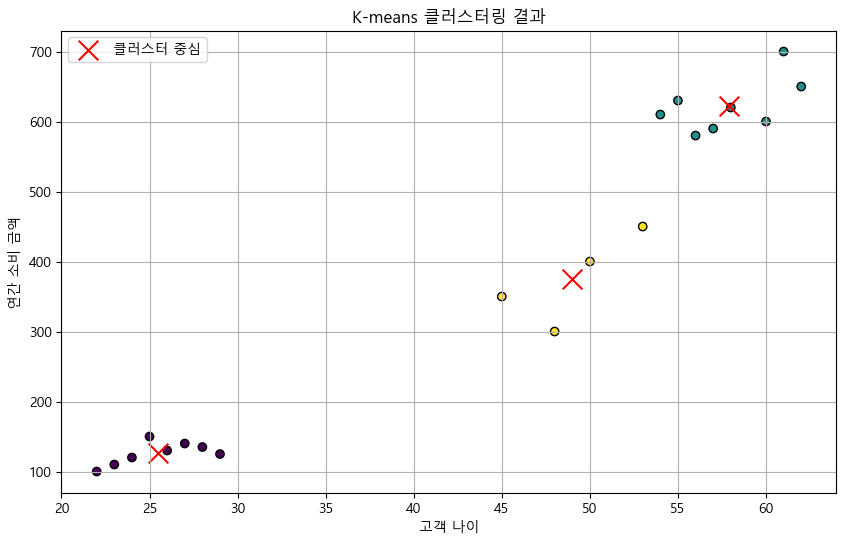

In [298]:
plt.figure(figsize = (10, 6))
plt.scatter(df['고객 나이'], df['연간 소비 금액(만원)'], c=df['클러스터'], cmap = 'viridis', marker='o', edgecolors='k')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='클러스터 중심')

plt.title('K-means 클러스터링 결과')
plt.xlabel('고객 나이')
plt.ylabel('연간 소비 금액')
plt.legend()
plt.grid()
plt.show()


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 과일가게에서 과일의 신선도를 예측하는 모델을 만들고, 어떤 요소들이 신선도를 결정하는지 분석해보세요. 랜덤포레스트를 사용하여 과일의 신선도를 예측하고, 피처 중요도를 시각화해보세요.
1. 과일의 크기, 무게, 색의 선명도(0~255) 등의 피쳐를 사용하여 신선도(1:신선, 0:신선하지않음)를 예측하는 랜덤포레스트 모델을 학습시켜보세요.
2. 학습 후, 피쳐 중요도를 시각화하여 어떤 요소가 신선도 예측에 가장 큰 영향을 미치는지 분석해보세요

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# 난수의 시드를 설정해주면 동일조건에서 실험을 반복할 수 있음
np.random.seed(42)

data = {
    '과일 크기(cm)': np.random.randint(5, 15, 100),
    '과일 무게(g)': np.random.randint(100, 500, 100),
    '색의 선명도': np.random.randint(100, 255, 100),
    '신선도': np.random.choice([0, 1], 100)
}

df = pd.DataFrame(data)
df.head()

,과일 크기(cm),과일 무게(g),색의 선명도,신선도
0,11,367,212,1
1,8,132,101,0
2,12,147,229,1
3,9,161,153,0
4,11,315,186,0


In [272]:
X = df.drop(['신선도'], axis=1)
y = df['신선도']

In [273]:
X_train_fruits, X_test_fruits, y_train_fruits, y_test_fruits = train_test_split(X, y, test_size=.2, random_state=42)

In [276]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [277]:
model.fit(X_train_fruits,y_train_fruits)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [278]:
y_pred_fruits = model.predict(X_test_fruits)
y_pred_fruits

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [279]:
X.columns

Index(['과일 크기(cm)', '과일 무게(g)', '색의 선명도'], dtype='object')

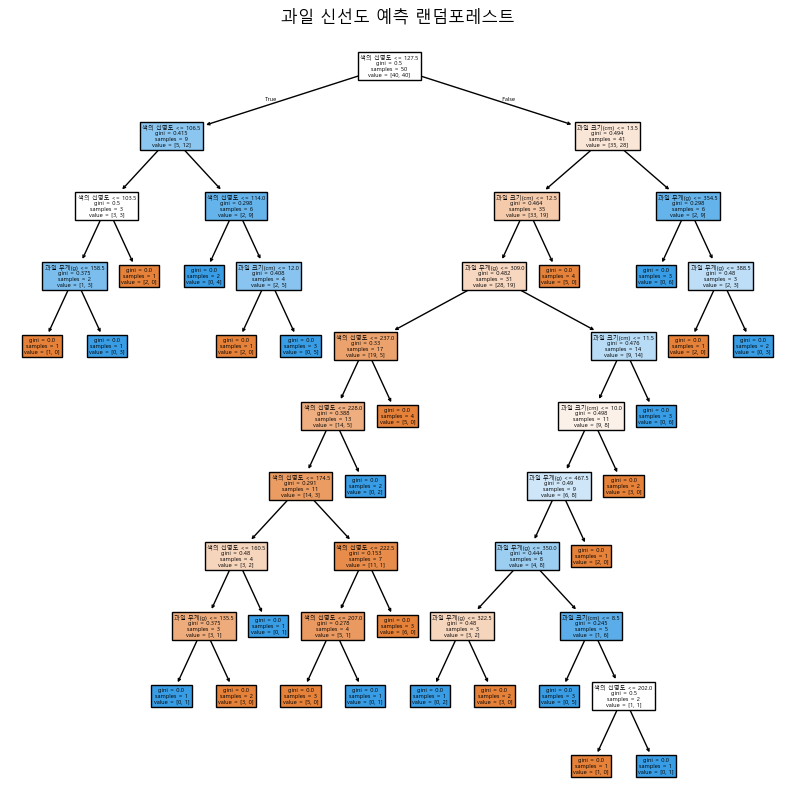

In [281]:
plt.figure(figsize = (10, 10))
plot_tree(model.estimators_[1], feature_names=X.columns, filled=True)
plt.title('과일 신선도 예측 랜덤포레스트')
plt.show()

In [282]:
accuract = accuracy_score(y_test_fruits, y_pred_fruits)
print(f'과일 신선도 모델의 정확도 : {accuracy}')

과일 신선도 모델의 정확도 : 0.956140350877193


In [283]:
feature_important = model.feature_importances_
feature_important

array([0.2109107 , 0.41934674, 0.36974256])

In [285]:
features = X.columns
features

Index(['과일 크기(cm)', '과일 무게(g)', '색의 선명도'], dtype='object')

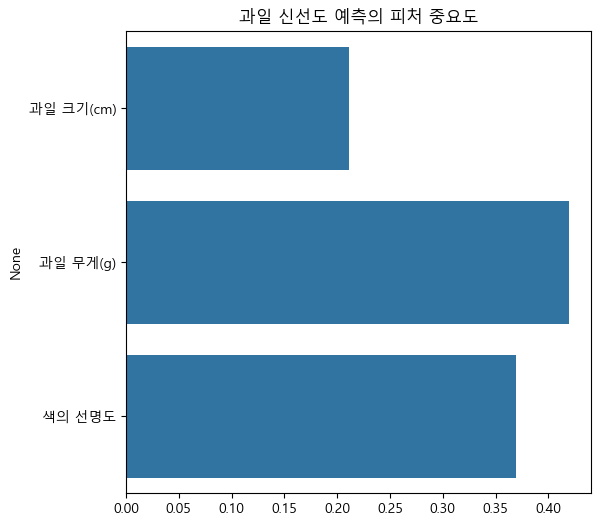

In [286]:
plt.figure(figsize = (6, 6))
sns.barplot(x = feature_important, y = features)
plt.title('과일 신선도 예측의 피처 중요도')
plt.show()

Q2. 학생 성적데이터를 사용하여 학생들의 성적을 분석하여 비슷한 그룹으로 묶기 위해 k-means 클러스터링을 수행해보세요

1. 두 과목의 성적을 기반으로 k-means 클러스터링을 수행해보세요
2. 결과를 시각화해보세요

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    '학생ID': range(1, 21),
    '수학 성적': [95, 85, 76, 88, 90, 70, 60, 82, 78, 92,
               88, 75, 80, 85, 86, 95, 91, 89, 77, 81],
    '과학 성적': [90, 80, 85, 87, 89, 70, 68, 79, 75, 91,
               84, 72, 78, 83, 80, 90, 88, 85, 70, 82],
    '영어 성적': [80, 75, 78, 82, 84, 70, 60, 88, 70, 86,
                85, 73, 76, 79, 77, 82, 89, 81, 73, 80]
}

df = pd.DataFrame(data)
df.head()

,학생ID,수학 성적,과학 성적,영어 성적
0,1,95,90,80
1,2,85,80,75
2,3,76,85,78
3,4,88,87,82
4,5,90,89,84


In [301]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['학생ID'], axis = 1))

In [302]:
scaled_data

array([[ 1.38195356,  1.23147463,  0.23428297],
       [ 0.21574802, -0.18401345, -0.4978513 ],
       [-0.83383696,  0.52373059, -0.05857074],
       [ 0.56560969,  0.8068282 ,  0.52713667],
       [ 0.79885079,  1.08992582,  0.81999038],
       [-1.53356028, -1.59950153, -1.22998557],
       [-2.69976582, -1.88259914, -2.6942541 ],
       [-0.13411364, -0.32556226,  1.40569779],
       [-0.60059585, -0.89175749, -1.22998557],
       [ 1.0320919 ,  1.37302343,  1.11284408],
       [ 0.56560969,  0.38218178,  0.96641723],
       [-0.95045751, -1.31640391, -0.79070501],
       [-0.36735475, -0.46711106, -0.35142445],
       [ 0.21574802,  0.24063297,  0.08785611],
       [ 0.33236858, -0.18401345, -0.20499759],
       [ 1.38195356,  1.23147463,  0.52713667],
       [ 0.91547135,  0.94837701,  1.55212464],
       [ 0.68223024,  0.52373059,  0.38070982],
       [-0.71721641, -1.59950153, -0.79070501],
       [-0.25073419,  0.09908417,  0.23428297]])

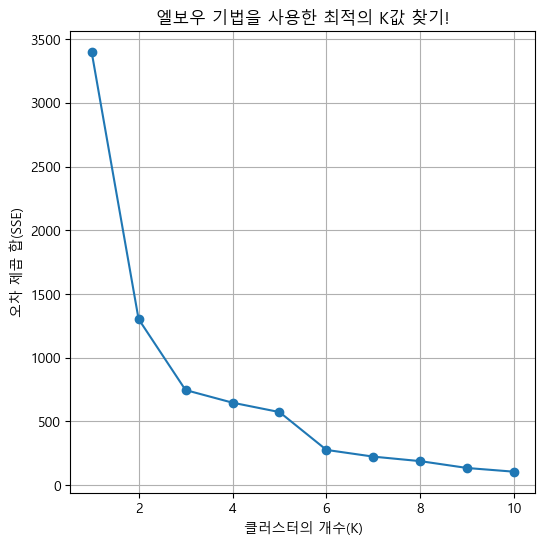

In [303]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['수학 성적', '과학 성적', '영어 성적']])
    sse.append(kmeans.inertia_)
    # SSE값을 저장

plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker = 'o')
plt.xlabel('클러스터의 개수(K)')
plt.ylabel('오차 제곱 합(SSE)')
plt.title('엘보우 기법을 사용한 최적의 K값 찾기!')
plt.grid()
plt.show()

In [304]:
kmeans = KMeans(n_clusters=3)
df['클러스터'] = kmeans.fit_predict(scaled_data)

In [306]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.30031918, -1.45795272, -1.34712705],
       [ 0.91547135,  0.94837701,  0.76508031],
       [-0.11745356, -0.04246464,  0.08785611]])

In [308]:
centroids_origin = scaler.inverse_transform(centroids)
centroids_origin

array([[72.        , 71.        , 69.2       ],
       [91.        , 88.        , 83.625     ],
       [82.14285714, 81.        , 79.        ]])

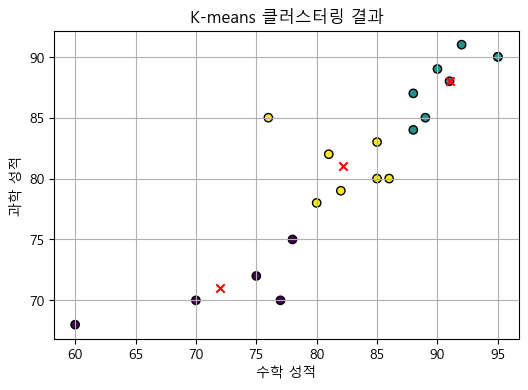

In [310]:
plt.figure(figsize = (6, 4))
plt.scatter(df['수학 성적'], df['과학 성적'], c = df['클러스터'], cmap = 'viridis', marker = 'o', edgecolors='k')
plt.scatter(centroids_origin[:,0], centroids_origin[:, 1], c='red', marker='x', label = '클러스터')
plt.title('K-means 클러스터링 결과')
plt.xlabel('수학 성적')
plt.ylabel('과학 성적')
plt.grid()
plt.show()

Q3. 온라인 쇼핑몰에서 고객의 구매 행동을 예측하고 고객들을 구매 패턴에 따라 그룹화해보세요. 구매 여부를 예측하고 그룹화하여 시각화하세요

1. 랜덤포레스트를 사용하여 고객의 월간 방문 횟수, 장바구니에 담긴 상품 수, 상품 가격대 등의 피처를 이용하여 구매 여부를 예측해보세요
2. 예측이 끝난 후, 고객을 K-MEANS 클러스터링으로 그룹화하여 구매패턴을 분석하고 시각화해보세요

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

num_customers = 100
customer_ids = np.arange(1, num_customers + 1)

# 랜덤 데이터 생성
np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
monthly = np.random.randint(1, 21, size=num_customers)  # 1~20 사이의 랜덤 값
basket = np.random.randint(1, 11, size=num_customers)  # 1~10 사이의 랜덤 값
price = np.random.choice(['저가', '중가', '고가'], size=num_customers)  # 가격대 랜덤 선택
purchase = np.random.choice([0, 1], size=num_customers, p=[0.5, 0.5])  # 50% 확률로 구매 여부 설정

# 데이터프레임 생성
df = pd.DataFrame({
    '고객ID': customer_ids,
    '월간 방문 횟수': monthly,
    '장바구니 상품 수': basket,
    '상품 가격대': price,
    '구매 여부': purchase 
})

df.head()

,고객ID,월간 방문 횟수,장바구니 상품 수,상품 가격대,구매 여부
0,1,7,3,고가,0
1,2,20,8,고가,1
2,3,15,6,중가,1
3,4,11,3,고가,1
4,5,8,1,고가,0
